In [1]:
import csv
import itertools
import time
import timeit

import numpy as np

from skimage.filters import threshold_mean
from skimage.morphology import skeletonize
from skimage import graph as skgraph

import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

from utils.plotting import *
from utils.process import *


## Read in MNIST data

In [2]:
mnist_filename = '../data/mnist/mnist_test.csv'
mnist_images, mnist_labels = read_in_mnist(mnist_filename)
mnist_binaries = [create_binary(image) for image in mnist_images]
mnist_skeletons = [create_skeleton(binary) for binary in mnist_binaries]


In [3]:
print(len(mnist_labels))
print(len(mnist_images))
print(len(mnist_binaries))
print(len(mnist_skeletons))


10000
10000
10000
10000


In [4]:
idx_0 = 10
idx_4 = 4
idx_5 = 694
idx_8 = 3406

label_0 = mnist_labels[idx_0]
label_4 = mnist_labels[idx_4]
label_5 = mnist_labels[idx_5]
label_8 = mnist_labels[idx_8]

img_0 = mnist_images[idx_0]
img_4 = mnist_images[idx_4]
img_5 = mnist_images[idx_5]
img_8 = mnist_images[idx_8]


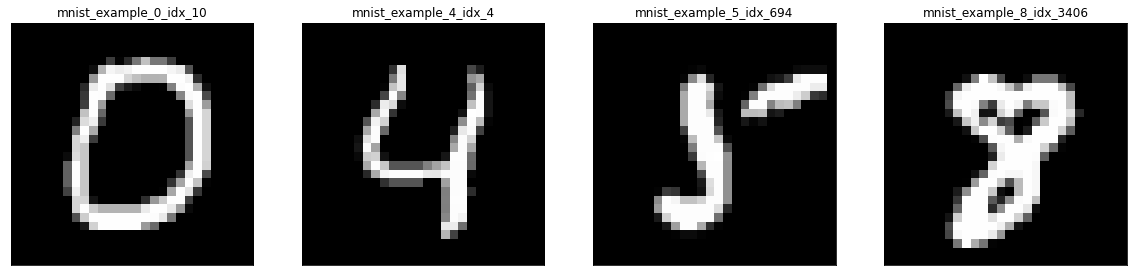

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15))

ax[0].imshow(img_0, cmap="gray")
ax[1].imshow(img_4, cmap="gray")
ax[2].imshow(img_5, cmap="gray")
ax[3].imshow(img_8, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])

ax[0].set_title("mnist_example_{}_idx_{}".format(label_0, idx_0))
ax[1].set_title("mnist_example_{}_idx_{}".format(label_4, idx_4))
ax[2].set_title("mnist_example_{}_idx_{}".format(label_5, idx_5))
ax[3].set_title("mnist_example_{}_idx_{}".format(label_8, idx_8))

plt.show()


## Create image binaries, skeletons

In [6]:
binary_0 = mnist_binaries[idx_0]
binary_4 = mnist_binaries[idx_4]
binary_5 = mnist_binaries[idx_5]
binary_8 = mnist_binaries[idx_8]

skeleton_0 = mnist_skeletons[idx_0]
skeleton_4 = mnist_skeletons[idx_4]
skeleton_5 = mnist_skeletons[idx_5]
skeleton_8 = mnist_skeletons[idx_8]


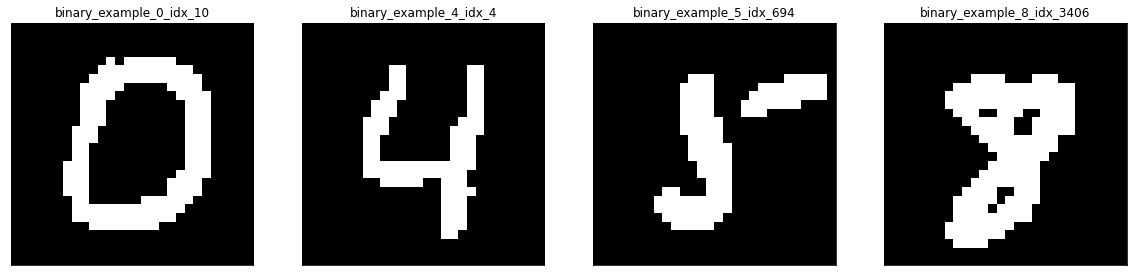

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15))

ax[0].imshow(binary_0, cmap="gray")
ax[1].imshow(binary_4, cmap="gray")
ax[2].imshow(binary_5, cmap="gray")
ax[3].imshow(binary_8, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("binary_example_{}_idx_{}".format(label_0, idx_0))
ax[1].set_title("binary_example_{}_idx_{}".format(label_4, idx_4))
ax[2].set_title("binary_example_{}_idx_{}".format(label_5, idx_5))
ax[3].set_title("binary_example_{}_idx_{}".format(label_8, idx_8))

plt.show()


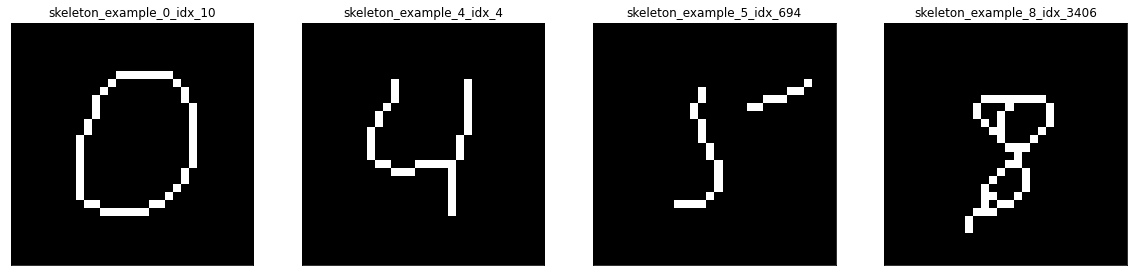

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15))

ax[0].imshow(skeleton_0, cmap="gray")
ax[1].imshow(skeleton_4, cmap="gray")
ax[2].imshow(skeleton_5, cmap="gray")
ax[3].imshow(skeleton_8, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("skeleton_example_{}_idx_{}".format(label_0, idx_0))
ax[1].set_title("skeleton_example_{}_idx_{}".format(label_4, idx_4))
ax[2].set_title("skeleton_example_{}_idx_{}".format(label_5, idx_5))
ax[3].set_title("skeleton_example_{}_idx_{}".format(label_8, idx_8))

plt.show()


## Convert image skeletons into skeleton graphs

In [9]:
# then convert to scipy sparse array
skeleton_array_0, coordinates_0 = create_skeleton_graph(skeleton_0, connectivity=2)
skeleton_array_4, coordinates_4 = create_skeleton_graph(skeleton_4, connectivity=2)
skeleton_array_5, coordinates_5 = create_skeleton_graph(skeleton_5, connectivity=2)
skeleton_array_8, coordinates_8 = create_skeleton_graph(skeleton_8, connectivity=2)

# create graph from scipy sparse array, get node locations and save as dict
skeleton_graph_0 = nx.from_scipy_sparse_array(skeleton_array_0)
skeleton_graph_4 = nx.from_scipy_sparse_array(skeleton_array_4)
skeleton_graph_5 = nx.from_scipy_sparse_array(skeleton_array_5)
skeleton_graph_8 = nx.from_scipy_sparse_array(skeleton_array_8)

# create node lookup dictionaries based on skeleton coordinates
search_by_node_0, search_by_location_0 = get_node_locations(coordinates_0)
search_by_node_4, search_by_location_4 = get_node_locations(coordinates_4)
search_by_node_5, search_by_location_5 = get_node_locations(coordinates_5)
search_by_node_8, search_by_location_8 = get_node_locations(coordinates_8)


## Path segmentation

### Example 8: complicated junction and multiple loops

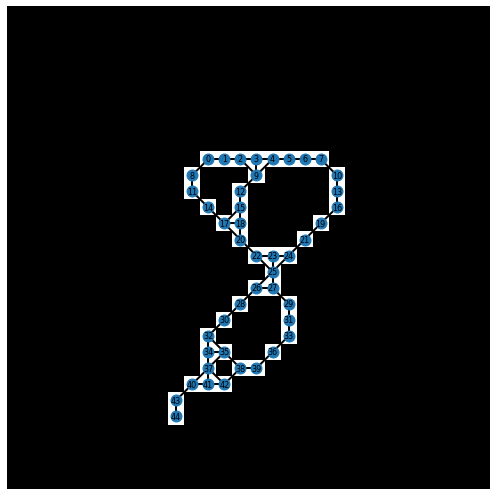

In [10]:
plot_graph(skeleton_8, skeleton_graph_8, coordinates_8, search_by_node_8, node_size=120, label_size=8)


In [11]:
result_dict_8 = TGGLinesPlus(skeleton_8)


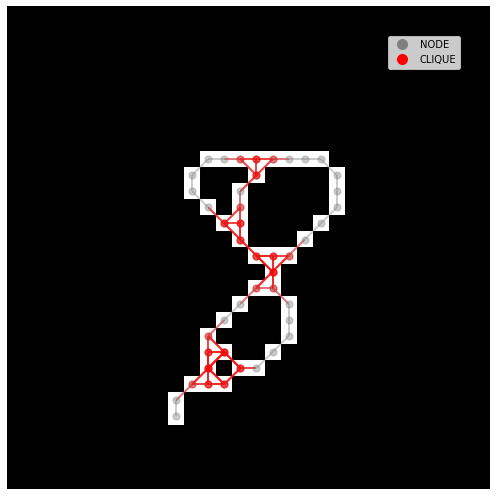

In [12]:
plot_cliques(result_dict_8, node_size=50, node_labels=False, show_legend=True)


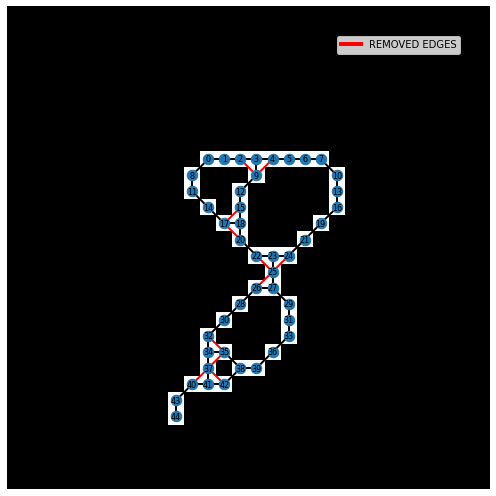

In [13]:
plot_removed_edges(result_dict_8, node_size=110, label_size=8, show_legend=True)


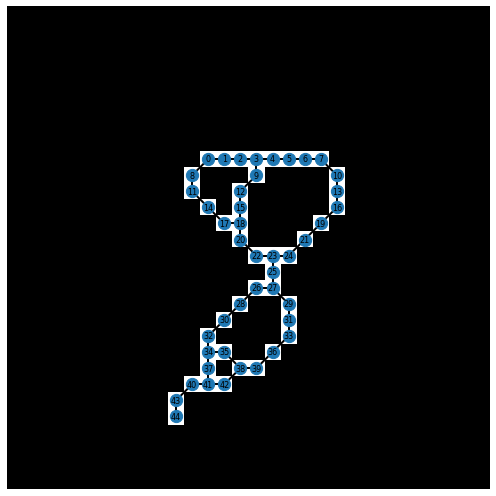

In [14]:
plot_simplified_graph(result_dict_8, node_size=150, label_size=8)


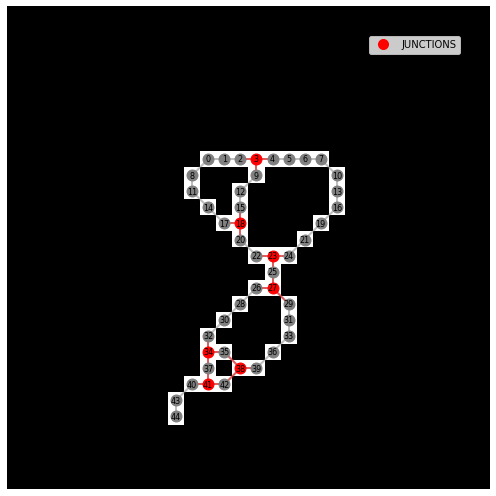

In [15]:
plot_junctions(result_dict_8, node_size=120, label_size=8,  show_legend=True)


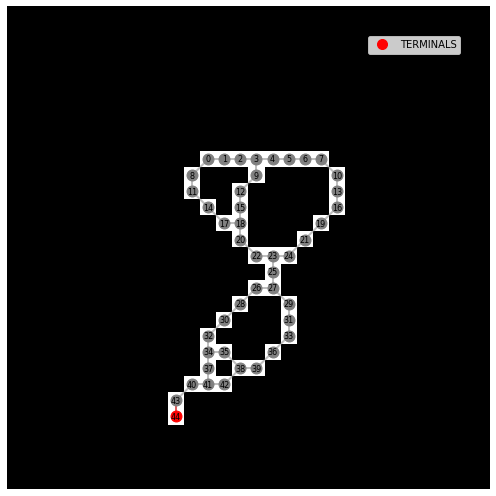

In [16]:
plot_terminals(result_dict_8, node_size=120, label_size=8,  show_legend=True)


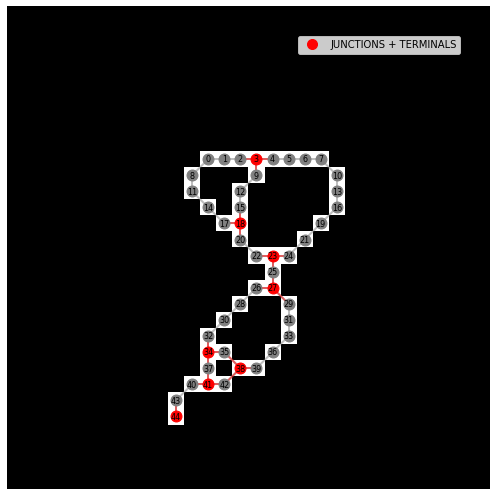

In [17]:
plot_pathseg_points(result_dict_8, node_size=120, label_size=8,  show_legend=True)


This is the colormap we use for plotting paths after the graph has been segmented, but feel free to design your own.

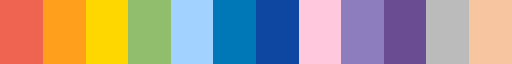

In [18]:
# should not contain colors close to limegreen and cherry red
custom_color_list = ["#ef6351", "#ff9f1c", "#ffd700", # yellows and oranges
                     "#90be6d",                       # greens
                    "#a2d2ff", "#0077b6", "#0d47a1",  # blues
                     "#ffc8dd", "#8e7dbe", "#6a4c93", # purples
                    "#bbbbbb", "#f7c59f"]             # grey and brown

cmap = ListedColormap(custom_color_list, name="Path Segmentation")
cmap

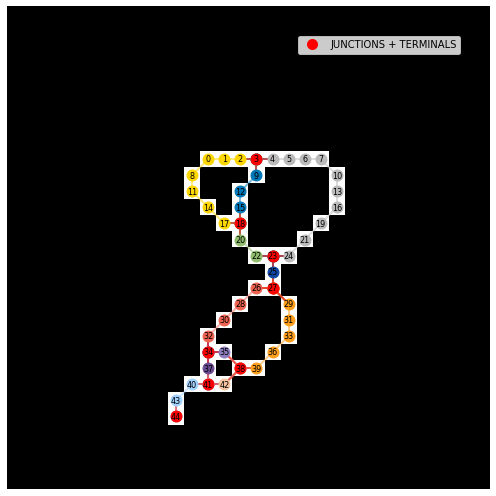

Paths list:
[3, 2, 1, 0, 8, 11, 14, 17, 18]
[3, 4, 5, 6, 7, 10, 13, 16, 19, 21, 24, 23]
[3, 9, 12, 15, 18]
[18, 20, 22, 23]
[23, 25, 27]
[27, 26, 28, 30, 32, 34]
[27, 29, 31, 33, 36, 39, 38]
[34, 35, 38]
[34, 37, 41]
[38, 42, 41]
[41, 40, 43, 44]


In [19]:
plot_graph_paths(result_dict_8, node_size=120, label_size=8, show_legend=True)
print("Paths list:")
for path in result_dict_8["paths_list"]:
    print(path)


### Example 5: separated subgraphs

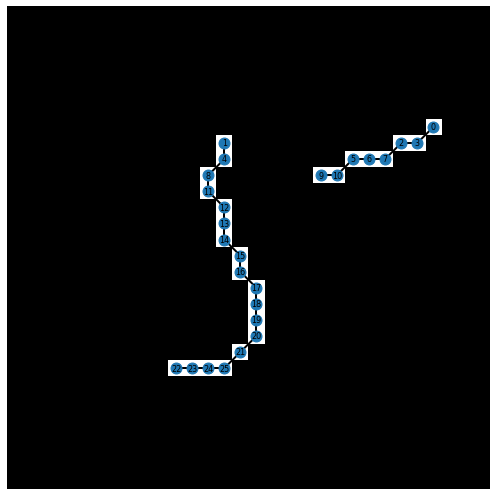

In [20]:
plot_graph(skeleton_5, skeleton_graph_5, coordinates_5, search_by_node_5, node_size=120, label_size=8)


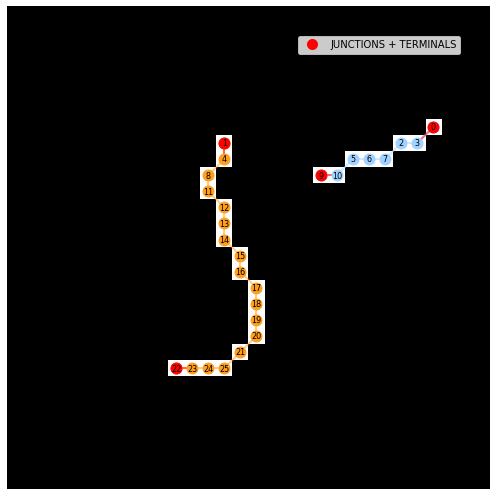

Paths list:
[0, 3, 2, 7, 6, 5, 10, 9]
[1, 4, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 24, 23, 22]


In [21]:
result_dict_5 = TGGLinesPlus(skeleton_5)
plot_graph_paths(result_dict_5, node_size=120, label_size=8, show_legend=True)
print("Paths list:")
for path in result_dict_5["paths_list"]:
    print(path)


We can also plot the same kinds of things for individual subgraphs in the image if we wanted to. In order to do that, you need to access the `subgraphs_list` key in the result dictionary, and then index by the subgraph that you want.

**NOTE**: it may take some experimenting to get the subgraph that you want. The subgraphs are indexed by NetworkX after calling `nx.connected_componentes()`.

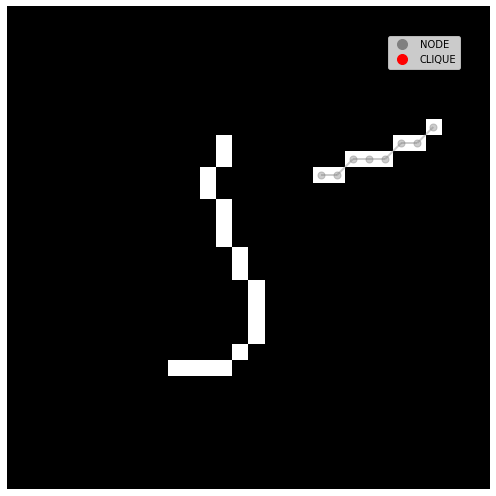

In [22]:
result_dict = result_dict_5["subgraphs_list"][0]
plot_cliques(result_dict, node_size=50, node_labels=False, show_legend=True)


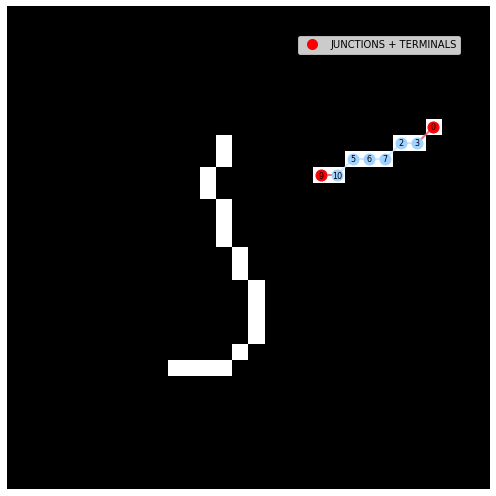

In [23]:
plot_graph_paths(result_dict, node_size=120, label_size=8, show_legend=True)


### Example 0: a continuous loop with no junctions or end nodes

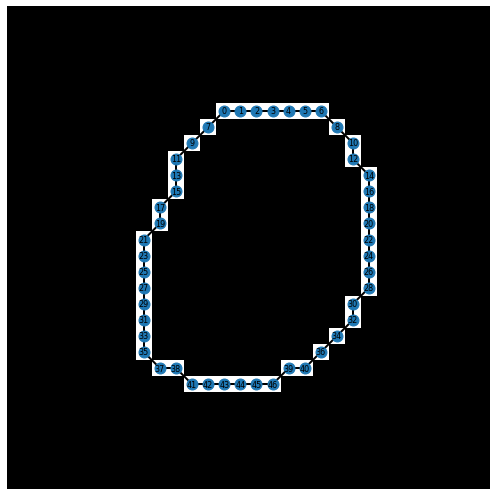

In [24]:
plot_graph(skeleton_0, skeleton_graph_0, coordinates_0, search_by_node_0, node_size=120, label_size=8)


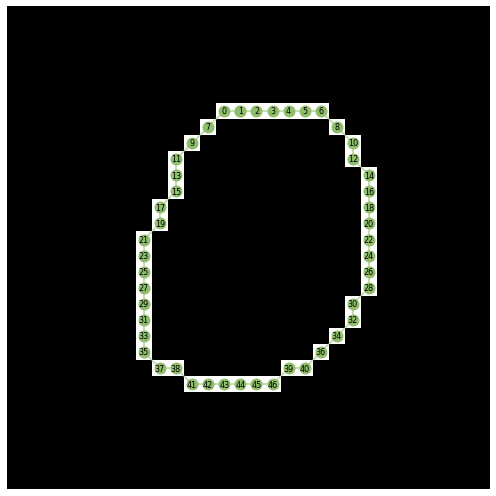

Paths list:
[1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 40, 39, 46, 45, 44, 43, 42, 41, 38, 37, 35, 33, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13, 11, 9, 7, 0, 1]


In [25]:
result_dict_0 = TGGLinesPlus(skeleton_0)
plot_graph_paths(result_dict_0, node_size=120, label_size=8)

print("Paths list:")
for path in result_dict_0["paths_list"]:
    print(path)


### Example 4: a junction with no loops

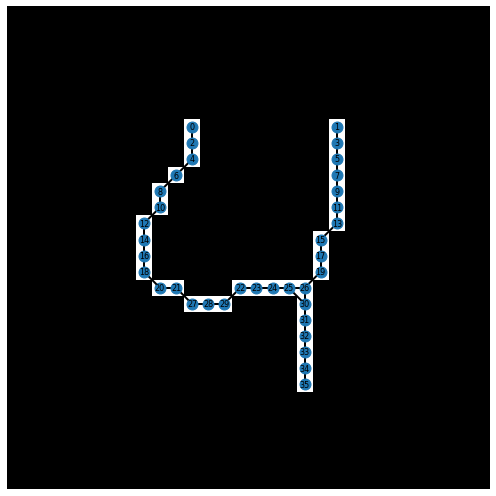

In [26]:
plot_graph(skeleton_4, skeleton_graph_4, coordinates_4, search_by_node_4, node_size=120, label_size=8)


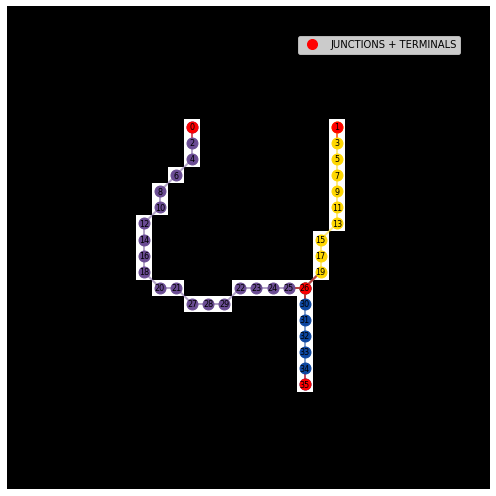

Paths list:
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 21, 27, 28, 29, 22, 23, 24, 25, 26]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 26]
[26, 30, 31, 32, 33, 34, 35]


In [27]:
result_dict_4 = TGGLinesPlus(skeleton_4)
plot_graph_paths(result_dict_4, node_size=120, label_size=8, show_legend=True)

print("Paths list:")
for path in result_dict_4["paths_list"]:
    print(path)


### Another interesting example: a graph with multiple loops

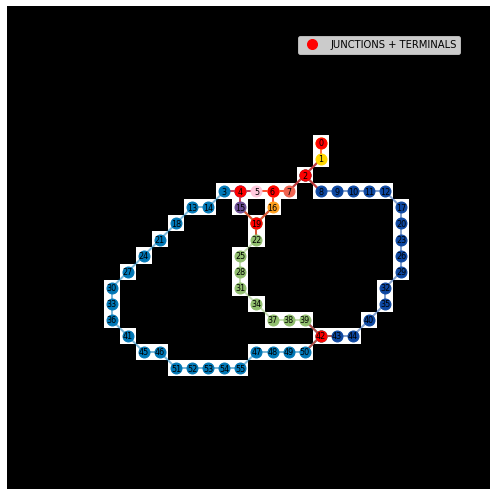

Paths list:
[0, 1, 2]
[2, 7, 6]
[2, 8, 9, 10, 11, 12, 17, 20, 23, 26, 29, 32, 35, 40, 44, 43, 42]
[4, 3, 14, 13, 18, 21, 24, 27, 30, 33, 36, 41, 45, 46, 51, 52, 53, 54, 55, 47, 48, 49, 50, 42]
[4, 5, 6]
[4, 15, 19]
[6, 16, 19]
[19, 22, 25, 28, 31, 34, 37, 38, 39, 42]


In [28]:
idx_5165 = 5165
label_5165 = mnist_labels[idx_5165]
img_5165 = mnist_images[idx_5165]
skeleton_5165 = mnist_skeletons[idx_5165]

result_dict_5165 = TGGLinesPlus(skeleton_5165)
plot_graph_paths(result_dict_5165, node_size=120, label_size=8, show_legend=True)

print("Paths list:")
for path in result_dict_5165["paths_list"]:
    print(path)


### Two examples with cycles

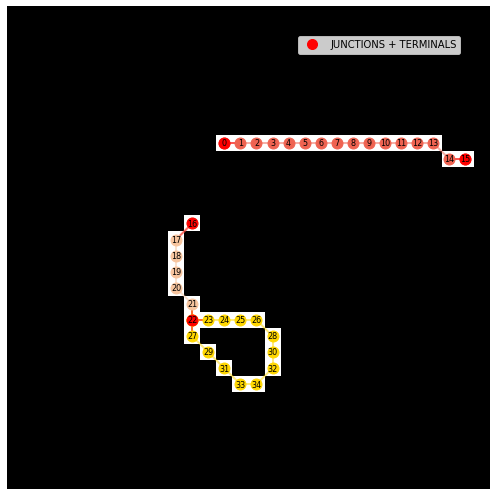

Paths list:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[16, 17, 18, 19, 20, 21, 22]
[22, 27, 29, 31, 33, 34, 32, 30, 28, 26, 25, 24, 23, 22]


In [29]:
idx_1911 = 1911
label_1911 = mnist_labels[idx_1911]
img_1911 = mnist_images[idx_1911]
skeleton_1911 = mnist_skeletons[idx_1911]

result_dict_1911 = TGGLinesPlus(skeleton_1911)
plot_graph_paths(result_dict_1911, node_size=120, label_size=8, show_legend=True)

print("Paths list:")
for path in result_dict_1911["paths_list"]:
    print(path)


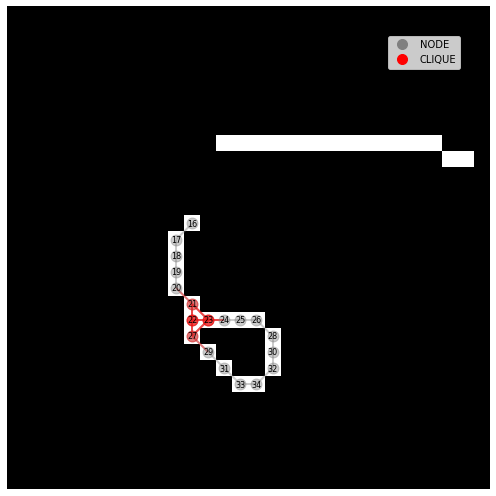

In [30]:
result_dict = result_dict_1911["subgraphs_list"][1]
plot_cliques(result_dict, node_size=120, label_size=8, show_legend=True)


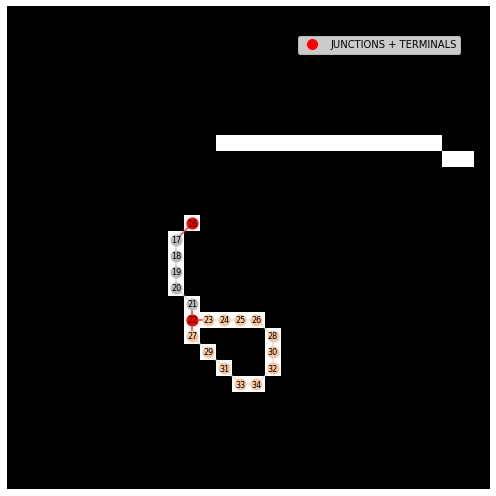

Paths list:
[16, 17, 18, 19, 20, 21, 22]
[22, 27, 29, 31, 33, 34, 32, 30, 28, 26, 25, 24, 23, 22]


In [31]:
plot_graph_paths(result_dict, node_size=120, label_size=8, show_legend=True)

print("Paths list:")
for path in result_dict["paths_list"]:
    print(path)


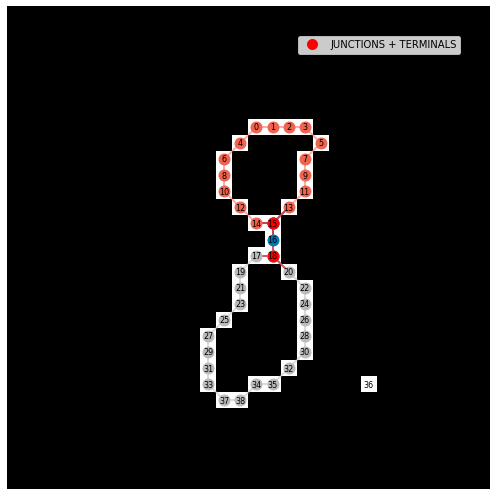

Paths list:
[15, 14, 12, 10, 8, 6, 4, 0, 1, 2, 3, 5, 7, 9, 11, 13, 15]
[15, 16, 18]
[18, 20, 22, 24, 26, 28, 30, 32, 35, 34, 38, 37, 33, 31, 29, 27, 25, 23, 21, 19, 17, 18]


In [32]:
idx_5061 = 5061
label_5061 = mnist_labels[idx_5061]
img_5061 = mnist_images[idx_5061]
skeleton_5061 = mnist_skeletons[idx_5061]

result_dict_5061 = TGGLinesPlus(skeleton_5061)
plot_graph_paths(result_dict_5061, node_size=120, label_size=8, show_legend=True)

print("Paths list:")
for path in result_dict_5061["paths_list"]:
    print(path)


### A few examples with junction "clusters"

In [33]:
# idx = 572
# idx = 1229
# idx = 2254 # this is the paper figure image
# idx = 2918

idx = 2918
label = mnist_labels[idx]
img = mnist_images[idx]
binary = mnist_binaries[idx]
skeleton = mnist_skeletons[idx]


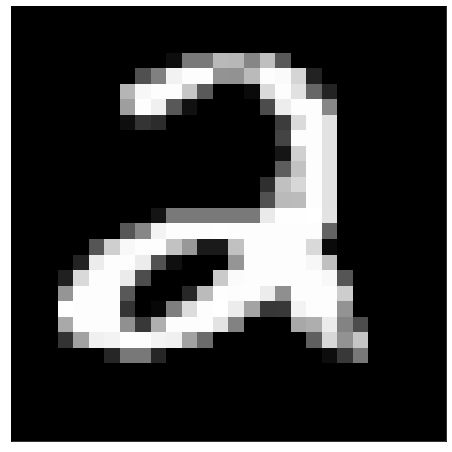

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


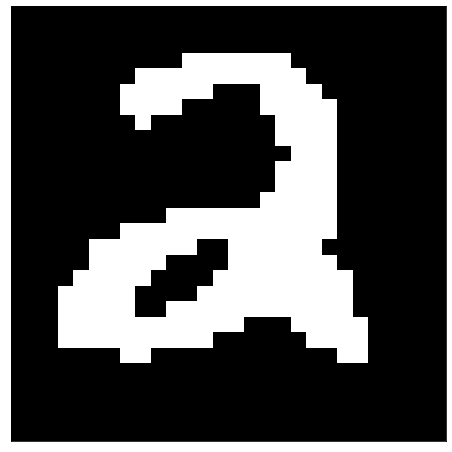

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(binary, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


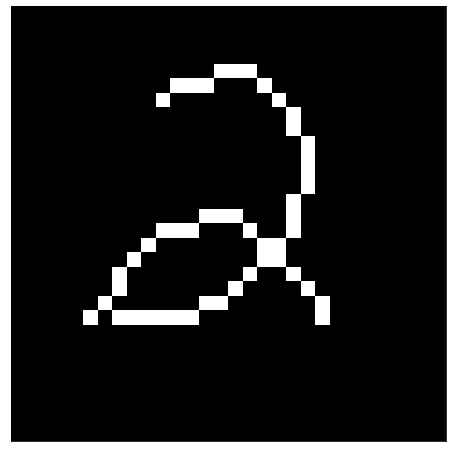

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(skeleton, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


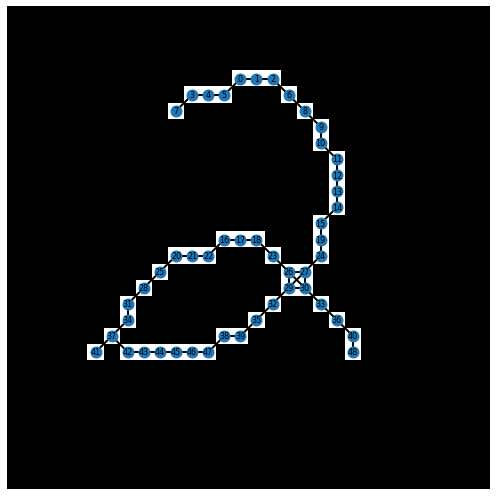

In [37]:
skeleton_array, coordinates = create_skeleton_graph(skeleton, connectivity=2)
skeleton_graph = nx.from_scipy_sparse_array(skeleton_array)
search_by_node, search_by_location = get_node_locations(coordinates)

plot_graph(skeleton, skeleton_graph, coordinates, search_by_node, node_size=120, label_size=8)


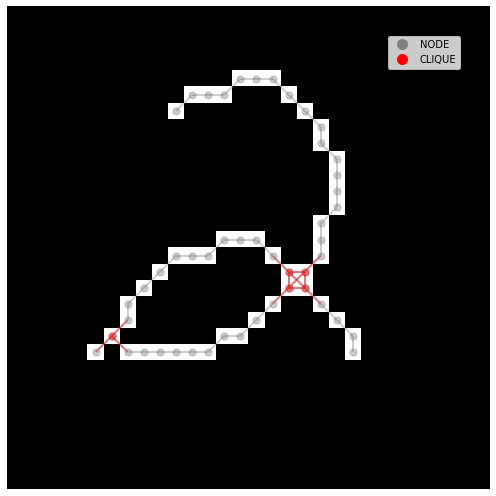

In [38]:
result_dict = TGGLinesPlus(skeleton)
plot_cliques(result_dict, "", node_size=50, node_labels=False, show_legend=True)


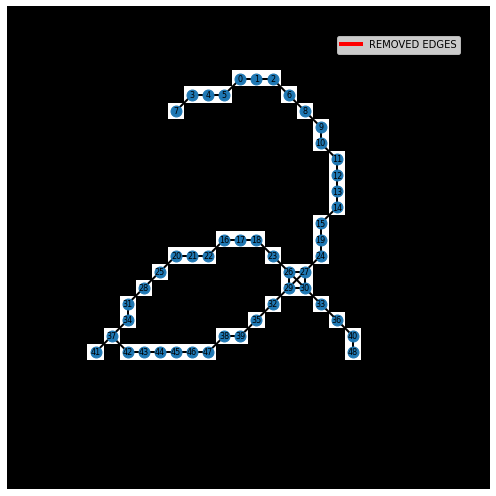

In [39]:
plot_removed_edges(result_dict, node_size=120, label_size=8, show_legend=True)


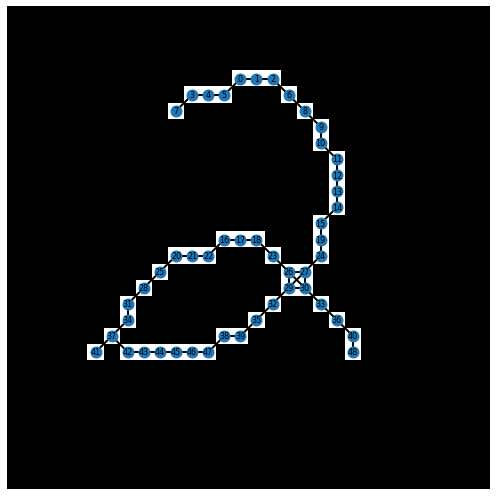

In [40]:
plot_simplified_graph(result_dict, node_size=120, label_size=8)


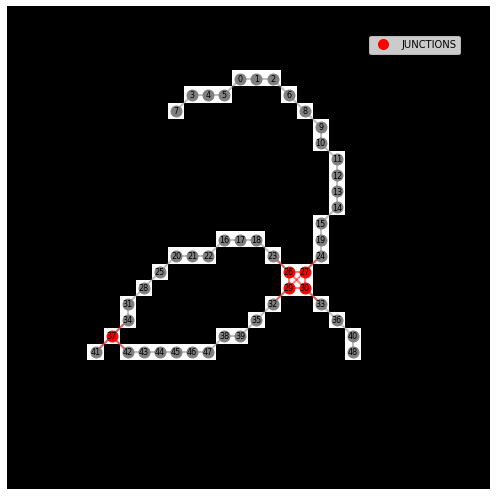

In [41]:
plot_junctions(result_dict, node_size=120, label_size=8, show_legend=True)


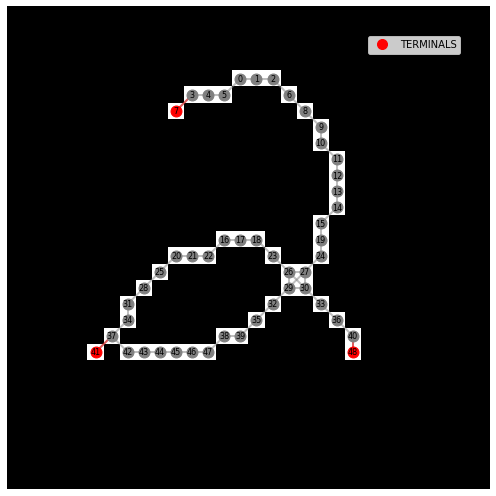

In [42]:
plot_terminals(result_dict, node_size=120, label_size=8, show_legend=True)


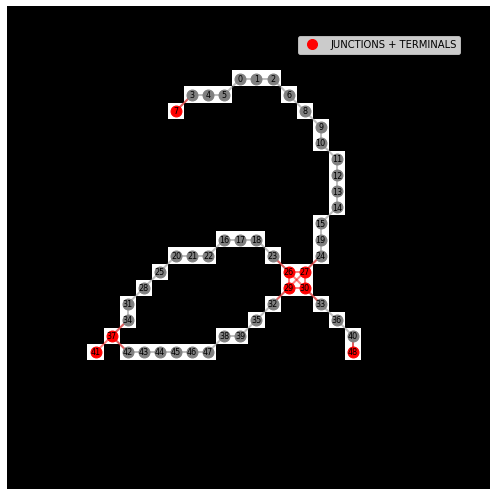

In [43]:
plot_pathseg_points(result_dict, node_size=120, label_size=8, show_legend=True)


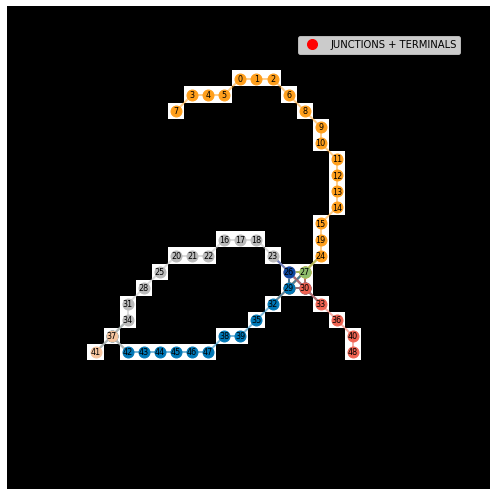

Paths list:
[7, 3, 4, 5, 0, 1, 2, 6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 24, 27]
[26, 23, 18, 17, 16, 22, 21, 20, 25, 28, 31, 34, 37]
[26, 27]
[26, 29]
[26, 30]
[27, 29]
[27, 30]
[29, 30]
[29, 32, 35, 39, 38, 47, 46, 45, 44, 43, 42, 37]
[30, 33, 36, 40, 48]
[37, 41]


In [44]:
plot_graph_paths(result_dict, node_size=120, plot_pathseg_points=False, label_size=8, show_legend=True)

print("Paths list:")
for path in result_dict["paths_list"]:
    print(path)


### What about a really messy example?

In [45]:
idx = 1411
label = mnist_labels[idx]
img = mnist_images[idx]
binary = mnist_binaries[idx]
skeleton = mnist_skeletons[idx]


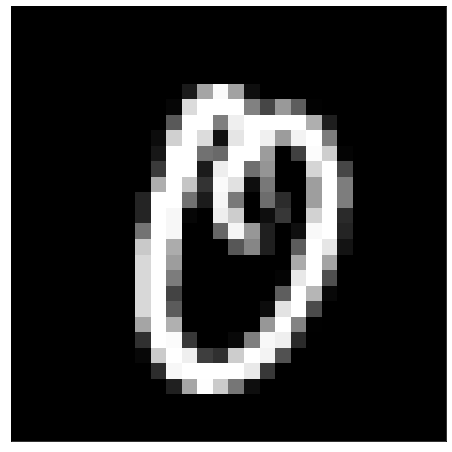

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


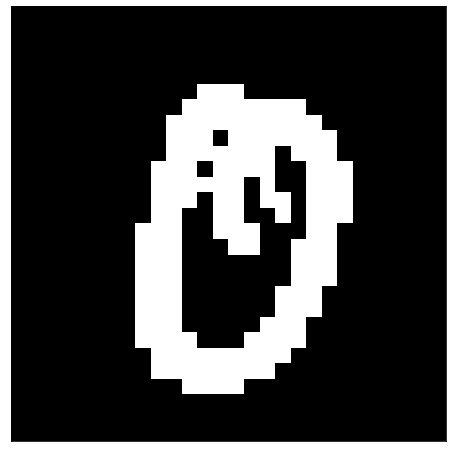

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(binary, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


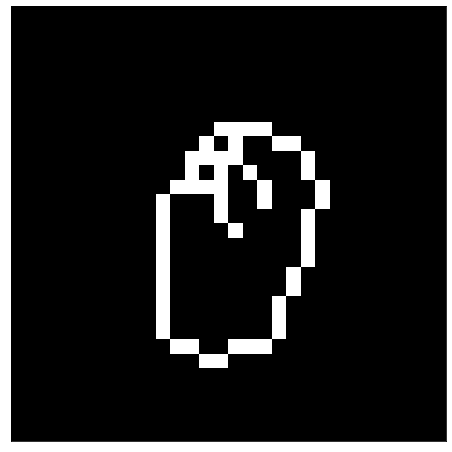

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(skeleton, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


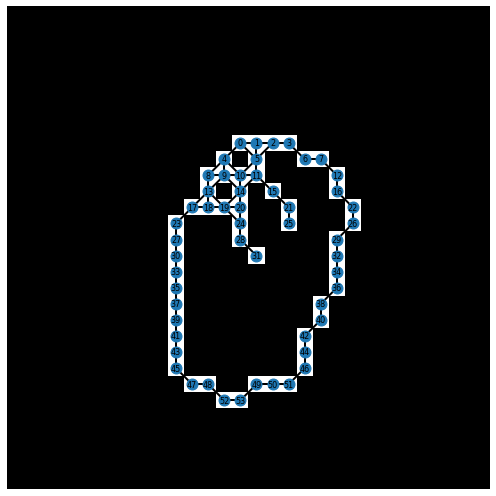

In [49]:
skeleton_array, coordinates = create_skeleton_graph(skeleton, connectivity=2)
skeleton_graph = nx.from_scipy_sparse_array(skeleton_array)
search_by_node, search_by_location = get_node_locations(coordinates)

plot_graph(skeleton, skeleton_graph, coordinates, search_by_node, node_size=120, label_size=8)


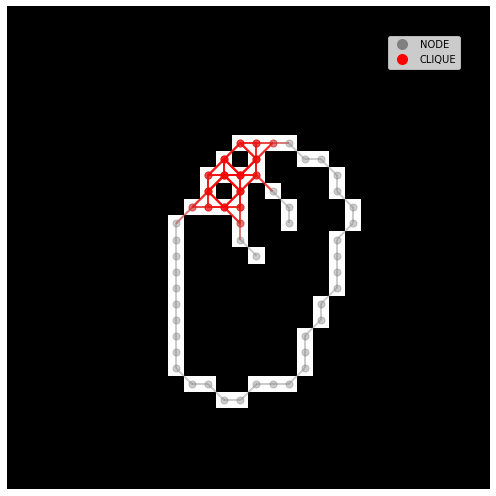

In [50]:
result_dict = TGGLinesPlus(skeleton)
plot_cliques(result_dict, "", node_size=50, node_labels=False, show_legend=True)


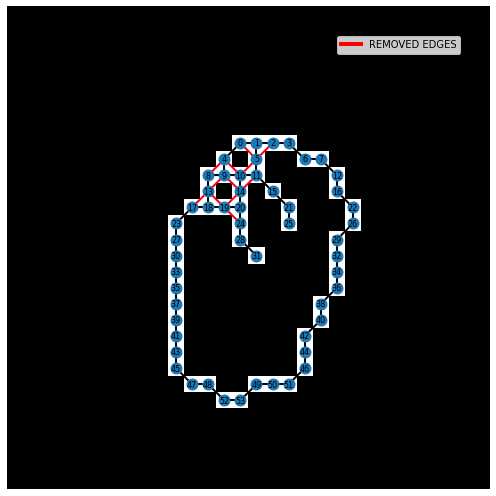

In [51]:
plot_removed_edges(result_dict, node_size=120, label_size=8, show_legend=True)


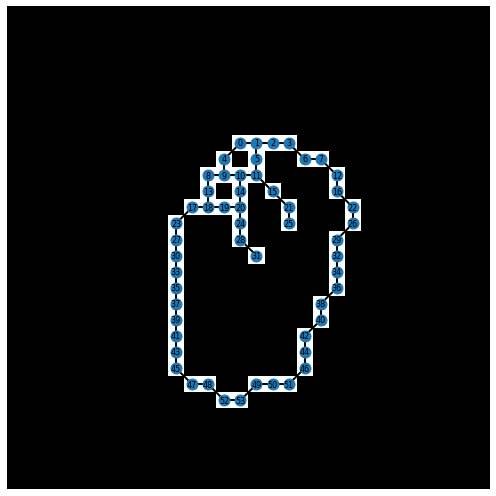

In [52]:
plot_simplified_graph(result_dict, node_size=120, label_size=8)


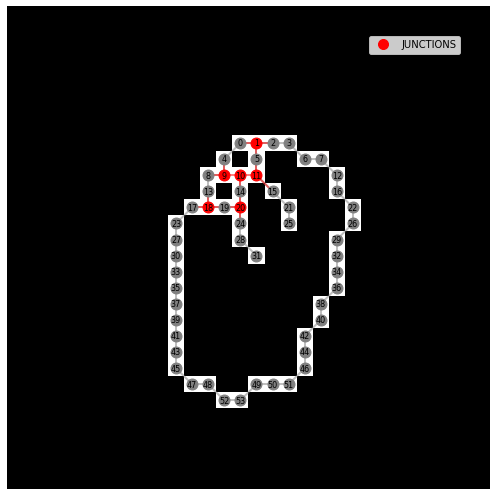

In [53]:
plot_junctions(result_dict, node_size=120, label_size=8, show_legend=True)


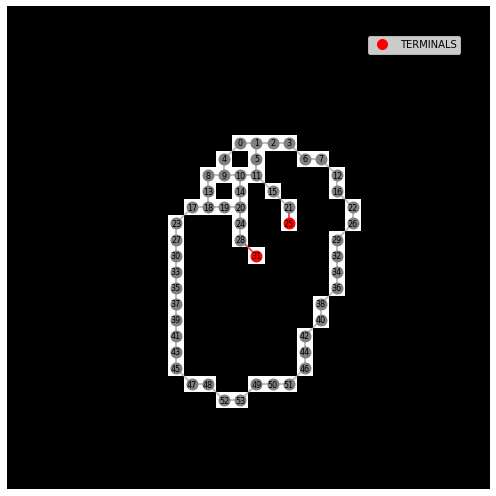

In [54]:
plot_terminals(result_dict, node_size=120, label_size=8, show_legend=True)


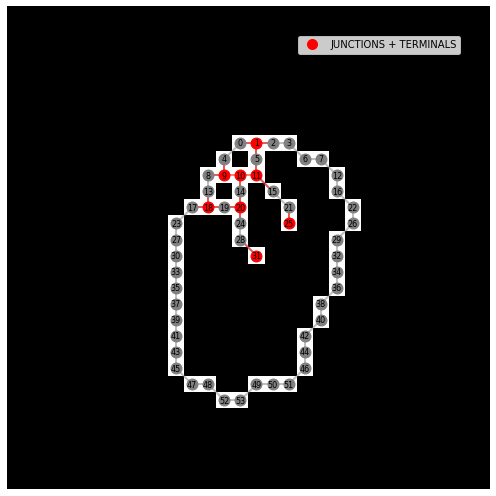

In [55]:
plot_pathseg_points(result_dict, node_size=120, label_size=8, show_legend=True)


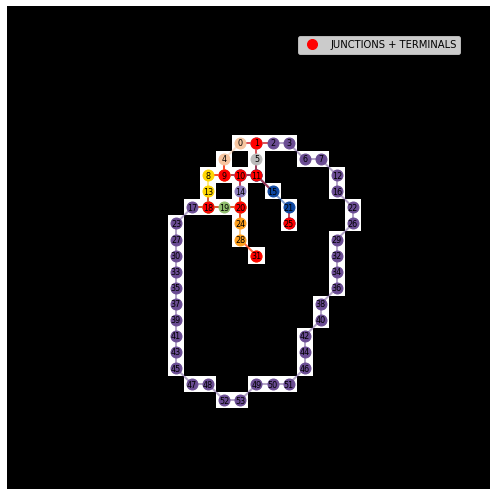

Paths list:
[1, 0, 4, 9]
[1, 2, 3, 6, 7, 12, 16, 22, 26, 29, 32, 34, 36, 38, 40, 42, 44, 46, 51, 50, 49, 53, 52, 48, 47, 45, 43, 41, 39, 37, 35, 33, 30, 27, 23, 17, 18]
[1, 5, 11]
[9, 8, 13, 18]
[9, 10]
[10, 11]
[10, 14, 20]
[11, 15, 21, 25]
[18, 19, 20]
[20, 24, 28, 31]


In [56]:
plot_graph_paths(result_dict, node_size=120, label_size=8, show_legend=True)

print("Paths list:")
for path in result_dict["paths_list"]:
    print(path)


### An interesting example where a cycle has more than one junction node!

In [57]:
idx = 110
label = mnist_labels[idx]
img = mnist_images[idx]
binary = mnist_binaries[idx]
skeleton = mnist_skeletons[idx]


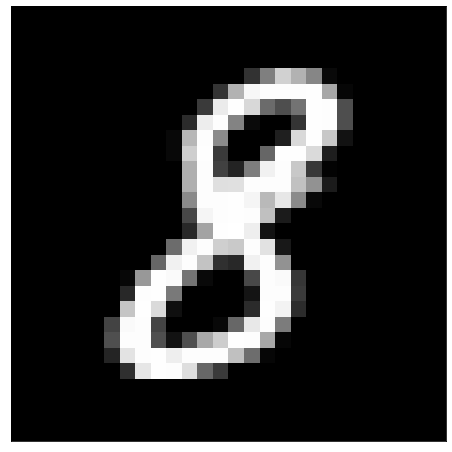

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


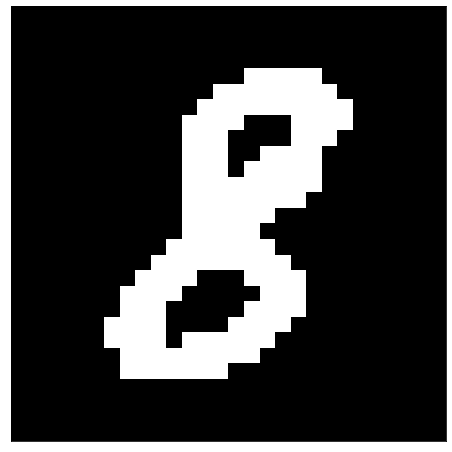

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(binary, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


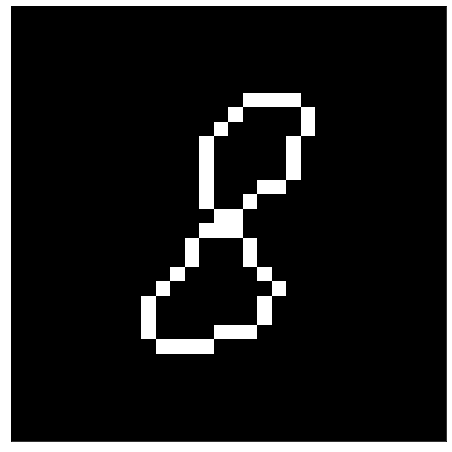

In [60]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(skeleton, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


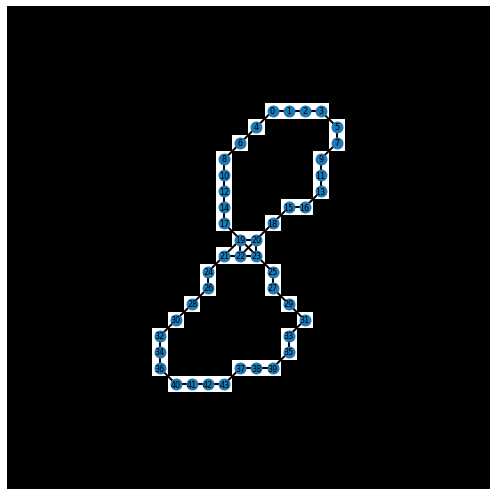

In [61]:
skeleton_array, coordinates = create_skeleton_graph(skeleton, connectivity=2)
skeleton_graph = nx.from_scipy_sparse_array(skeleton_array)
search_by_node, search_by_location = get_node_locations(coordinates)

plot_graph(skeleton, skeleton_graph, coordinates, search_by_node, node_size=120, label_size=8)


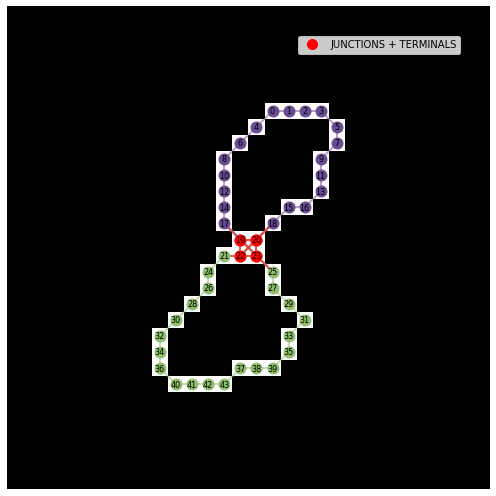

Paths list:
[19, 17, 14, 12, 10, 8, 6, 4, 0, 1, 2, 3, 5, 7, 9, 11, 13, 16, 15, 18, 20]
[19, 20]
[19, 22]
[19, 23]
[20, 22]
[20, 23]
[22, 21, 24, 26, 28, 30, 32, 34, 36, 40, 41, 42, 43, 37, 38, 39, 35, 33, 31, 29, 27, 25, 23]
[22, 23]


In [62]:
result_dict = TGGLinesPlus(skeleton)
plot_graph_paths(result_dict, node_size=120, label_size=8, show_legend=True)

print("Paths list:")
for path in result_dict["paths_list"]:
    print(path)


## A full processing pipeline

### Test the full processing pipeline's runtime

`timeit.default_timer()` measurements can be affected by other programs running on the same machine, so the best thing to do when accurate timing is necessary is to repeat the timing a few times and use the best time. The `-r` option is good for this; the default of 5 repetitions is probably enough in most cases. You can use `time.process_time()` to measure CPU time.

But we can only use `-r` for repetitions from the command line.

In [63]:
start = timeit.default_timer()

# note: we have already created the skeletons from the input images
result_dict_list = [TGGLinesPlus(skeleton) for skeleton in mnist_skeletons]

stop = timeit.default_timer()
print(f"Time to run: {(stop - start):.5f}s") 


Time to run: 46.91490s
